# Frey Face 

In [31]:
from scipy.io import loadmat
import numpy as np
from sklearn.model_selection import train_test_split
import h5py as h5

path = 'org_datasets/frey_rawface.mat'

raw = loadmat(path)
print(raw.keys())

img = np.array(raw['ff']).T.reshape((-1, 28* 20))

print(img.shape)

n_samples = img.shape[0]

X_train, X_test = train_test_split(img, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)

with h5.File(f'datasets/truth/freyFace_{n_samples}.h5', 'w') as f:
    gE = f.create_group('E')
    gO = f.create_group('O')
    gE.create_dataset('X0', data=X_train)
    gO.create_dataset('X0', data=X_test)

# import matplotlib.pyplot as plt
# plt.imshow(img.reshape(-1, 28, 20)[1000, :], cmap='gray')
# plt.show()


dict_keys(['__header__', '__version__', '__globals__', 'ff'])
(1965, 560)
(1375, 560) (590, 560)
<HDF5 file "freyFace_1965.h5" (mode r+)>


# Isomap Face

In [1]:
from scipy.io import loadmat
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import h5py as h5

org_data = loadmat(f'org_datasets/face_data/face_data.mat')
images = np.transpose(org_data['images'])
poses = np.transpose(org_data['poses'])
lights = np.transpose(org_data['lights'])

# import matplotlib.pyplot as plt
# plt.imshow(images.reshape(-1, 64, 64)[0, :].T, cmap='gray')
# plt.show()

X = images

print(X.shape)

reducer = PCA(n_components=512, random_state=35)
X = reducer.fit_transform(X)

print(X.shape)
n_samples = X.shape[0]
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)

with h5.File(f'datasets/truth/isomapFace_{n_samples}.h5', 'w') as f:
    gE = f.create_group('E')
    gO = f.create_group('O')
    gE.create_dataset('X0', data=X_train)
    gO.create_dataset('X0', data=X_test)


(698, 4096)
(698, 512)
(488, 512) (210, 512)


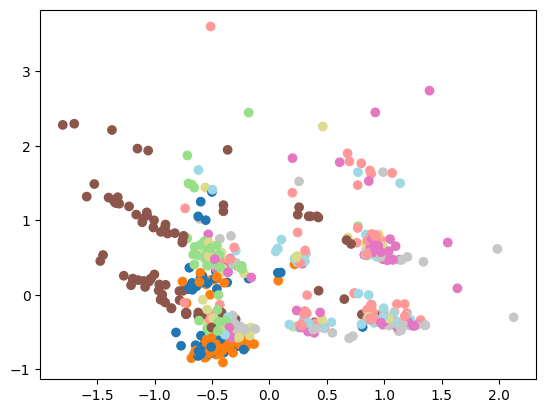

In [15]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import h5py as h5

with h5.File(f'org_datasets/cnae9/cnae9_1080.h5', 'r') as f:
    X = np.array(f['x'])
    y = np.array(f['y'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

pumap = PCA(n_components=2, random_state=35)
proj = pumap.fit_transform(X_train)

n_samples = X.shape[0]

import matplotlib.pyplot as plt
plt.scatter(proj[:, 0], proj[:, 1], c=y_train, cmap='tab20')
plt.show()

with h5.File(f'datasets/truth/cnae9_{n_samples}.h5', 'w') as f:
    gE = f.create_group('E')
    gO = f.create_group('O')
    gE.create_dataset('X0', data=X_train)
    gO.create_dataset('X0', data=X_test)
    gE.create_dataset('y0', data=y_train)
    gO.create_dataset('y0', data=y_test)



In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import h5py as h5
import glob
from tqdm import tqdm

pos_files = glob.glob("org_datasets/aclImdb/train/pos/*.txt")
pos_comments = []
neg_files = glob.glob("org_datasets/aclImdb/train/neg/*.txt")
neg_comments = []
for pf in tqdm(pos_files, desc="Reading Positive", ncols=100, unit="txt"):
    with open(pf, 'r', encoding='utf-8') as f:
        pos_comments.append(' '.join(f.readlines()))
for nf in tqdm(neg_files, desc="Reading Negative", ncols=100, unit="txt"):
    with open(nf, 'r', encoding='utf-8') as f:
        neg_comments.append(' '.join(f.readlines()))
comments = pos_comments + neg_comments
y = np.zeros((len(comments),)).astype('uint8')
y[:len(pos_comments)] = 1
tfidf = TfidfVectorizer(strip_accents='ascii',
                        stop_words='english', max_features=700)
X = tfidf.fit_transform(comments).todense()

X, _, y, _ = train_test_split(X, y, train_size=0.2, random_state=100, stratify=y)

n_samples = X.shape[0]


Reading Negative: 100%|█████████████████████████████████████| 12500/12500 [01:23<00:00, 149.47txt/s]


[[0.         0.         0.         ... 0.         0.11299976 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.11121965 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


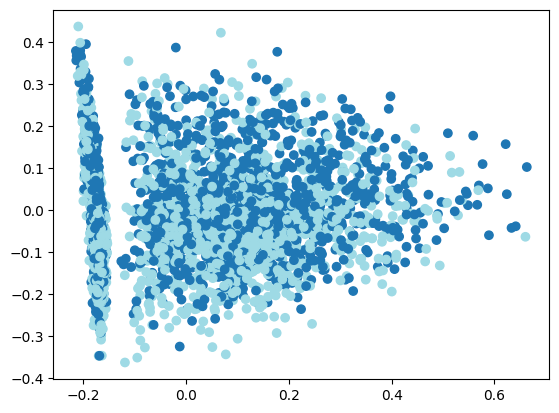

In [2]:
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=40, stratify=y)

print(X_train)

pumap = PCA(n_components=2, random_state=35)
proj = pumap.fit_transform(X_train)
import matplotlib.pyplot as plt
plt.scatter(proj[:, 0], proj[:, 1], c=y_train, cmap='tab20')
plt.show()

with h5.File(f'datasets/truth/imdb_{n_samples}.h5', 'w') as f:
    gE = f.create_group('E')
    gO = f.create_group('O')
    gE.create_dataset('X0', data=X_train)
    gO.create_dataset('X0', data=X_test)
    gE.create_dataset('y0', data=y_train)
    gO.create_dataset('y0', data=y_test)


(60000, 28, 28) (60000,)
(4200, 784) (4200,)


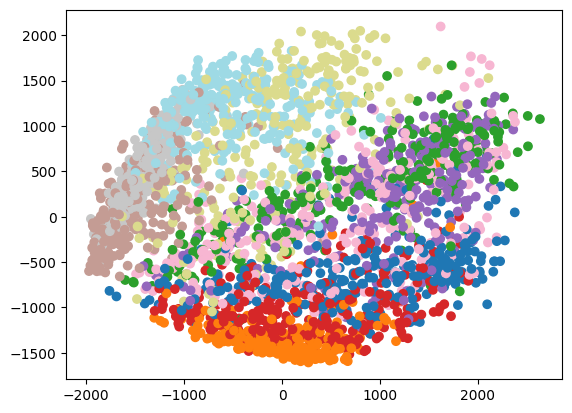

In [4]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import h5py as h5
import glob
from tqdm import tqdm
from torchvision.datasets import FashionMNIST
import torch

fmnist = FashionMNIST(root='org_datasets/fashionmnist', train=True, download=True, transform=None)

X = np.array(fmnist.data)
y = np.array(fmnist.targets).astype('int32')

print(X.shape, y.shape)
X, _, y, _ = train_test_split(X, y, train_size=0.07, random_state=1, stratify=y)
X = X.reshape((-1, 28 * 28))
y = y.squeeze()

n_samples = X.shape[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=40, stratify=y)

pumap = PCA(n_components=2, random_state=35)
proj = pumap.fit_transform(X_train)
import matplotlib.pyplot as plt
plt.scatter(proj[:, 0], proj[:, 1], c=y_train, cmap='tab20')
plt.show()

with h5.File(f'datasets/truth/fashionMNIST_{n_samples}.h5', 'w') as f:
    gE = f.create_group('E')
    gO = f.create_group('O')
    gE.create_dataset('X0', data=X_train)
    gO.create_dataset('X0', data=X_test)
    gE.create_dataset('y0', data=y_train)
    gO.create_dataset('y0', data=y_test)


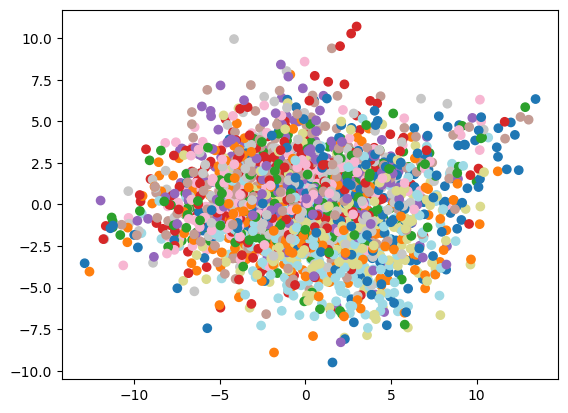

In [19]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import h5py as h5

with h5.File(f'org_datasets/cifar10/cifar10_3250.h5', 'r') as f:
    X = np.array(f['x'])
    y = np.array(f['y'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

pumap = PCA(n_components=2, random_state=35)
proj = pumap.fit_transform(X_train)

n_samples = X.shape[0]

import matplotlib.pyplot as plt
plt.scatter(proj[:, 0], proj[:, 1], c=y_train, cmap='tab20')
plt.show()

with h5.File(f'datasets/truth/cifar10_{n_samples}.h5', 'w') as f:
    gE = f.create_group('E')
    gO = f.create_group('O')
    gE.create_dataset('X0', data=X_train)
    gO.create_dataset('X0', data=X_test)
    gE.create_dataset('y0', data=y_train)
    gO.create_dataset('y0', data=y_test)



# dendritic

In [26]:
import scanpy as sc
import pandas as pd

expression_data = 'org_datasets/dendritic/dataset1_sm_uc3.txt'
adata = sc.read_text(expression_data, delimiter='\t', first_column_names=True, dtype='float64')
print(adata)  # 6954 x 1328
print(adata.obs_names[0:3])
print(adata.var_names[0:3])

adata = adata.transpose()
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
print(adata.obs_names[0:3])
print(adata.var_names[0:3])

AnnData object with n_obs × n_vars = 26593 × 576
Index(['1/2-SBSRNA4', '5S_RRNA', '5_8S_RRNA'], dtype='object')
Index(['pDC_P10_S73', 'pDC_P10_S74', 'pDC_P10_S75'], dtype='object')
Index(['pDC_P10_S73', 'pDC_P10_S74', 'pDC_P10_S75'], dtype='object')
Index(['1/2-SBSRNA4', '5S_RRNA', '5_8S_RRNA'], dtype='object')


In [31]:
# Read sample into a pandas series
cell_info = "org_datasets/dendritic/sample_sm_uc3.txt"
sample_adata = pd.read_csv(cell_info,header=0, index_col=0, sep='\t')
print(sample_adata.values.shape)
print(sample_adata.keys())
print(sample_adata.index)

(576, 3)
Index(['cell', 'celltype', 'batch'], dtype='object')
Index(['pDC_P10_S73', 'pDC_P10_S74', 'pDC_P10_S75', 'pDC_P10_S76',
       'pDC_P10_S77', 'pDC_P10_S78', 'pDC_P10_S79', 'pDC_P10_S80',
       'pDC_P10_S81', 'pDC_P10_S82',
       ...
       'CD1C_P4_S39', 'CD1C_P4_S40', 'CD1C_P4_S41', 'CD1C_P4_S42',
       'CD1C_P4_S43', 'CD1C_P4_S44', 'CD1C_P4_S45', 'CD1C_P4_S46',
       'CD1C_P4_S47', 'CD1C_P4_S48'],
      dtype='object', length=576)


In [33]:
adata.obs['batch'] = sample_adata.loc[adata.obs_names, "batch"]
print(len(adata.obs['batch']))
adata.obs['celltype'] = sample_adata.loc[adata.obs_names, "celltype"]
print(len(adata.obs['celltype']))

576
576


In [70]:
from sklearn.decomposition import  PCA
from umap import ParametricUMAP
import matplotlib.pyplot as plt
import h5py as h5

X = adata.X

X = PCA(n_components=50).fit_transform(X)

batch = adata.obs['batch'].factorize()[0]
y = adata.obs['celltype'].factorize()[0]

print(X.shape)

X_train = X[batch != 0]
y_train = y[batch != 0]
X_test = X[batch == 0]
y_test = y[batch == 0]

print(X_train.shape, X_test.shape)

n_samples = X.shape[0]
with h5.File(f'datasets/truth/dendritic_{n_samples}.h5', 'w') as f:
    gE = f.create_group('E')
    gO = f.create_group('O')
    gE.create_dataset('X0', data=X_train)
    gO.create_dataset('X0', data=X_test)
    gE.create_dataset('y0', data=y_train)
    gO.create_dataset('y0', data=y_test)

# pumap = ParametricUMAP(n_components=2)
# proj_train = pumap.fit_transform(X_train)
# proj_test = pumap.transform(X_test)

# plt.scatter(proj_train[:, 0], proj_train[:, 1], s=4, c='gray')
# plt.scatter(proj_test[:, 0], proj_test[:, 1], s=4, c=y_test, alpha=0.5)


(576, 50)
(288, 50) (288, 50)


# Pancreas

In [54]:
import scanpy as sc
import pandas as pd

expression_data = 'org_datasets/pancreas/myData_pancreatic_5batches.txt'
adata = sc.read_text(expression_data, delimiter='\t', first_column_names=True, dtype='float64')

adata = adata.transpose()
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
print(adata.obs_names) # 基因
print(adata.var_names) # 细胞

Index(['human1_lib1.final_cell_0001', 'human1_lib1.final_cell_0002',
       'human1_lib1.final_cell_0003', 'human1_lib1.final_cell_0004',
       'human1_lib1.final_cell_0005', 'human1_lib1.final_cell_0006',
       'human1_lib1.final_cell_0007', 'human1_lib1.final_cell_0008',
       'human1_lib1.final_cell_0009', 'human1_lib1.final_cell_0010',
       ...
       'Sample_1589', 'Sample_1590', 'Sample_1591', 'Sample_1592',
       'Sample_1593', 'Sample_1594', 'Sample_1595', 'Sample_1597',
       'Sample_1598', 'Sample_1600'],
      dtype='object', length=14767)
Index(['A1BG', 'A1CF', 'A2M', 'A2ML1', 'A4GALT', 'A4GNT', 'AAAS', 'AACS',
       'AACSP1', 'AADAC',
       ...
       'ZW10', 'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', length=15558)


In [55]:
cell_info = "org_datasets/pancreas/mySample_pancreatic_5batches.txt"
sample_adata = pd.read_csv(cell_info,header=0, index_col=0, sep='\t')
print(sample_adata.values.shape)
print(sample_adata.keys())
print(sample_adata.index)

(14767, 5)
Index(['batch', 'batchlb', 'celltype_orig', 'cellname', 'celltype'], dtype='object')
Index(['human1_lib1.final_cell_0001', 'human1_lib1.final_cell_0002',
       'human1_lib1.final_cell_0003', 'human1_lib1.final_cell_0004',
       'human1_lib1.final_cell_0005', 'human1_lib1.final_cell_0006',
       'human1_lib1.final_cell_0007', 'human1_lib1.final_cell_0008',
       'human1_lib1.final_cell_0009', 'human1_lib1.final_cell_0010',
       ...
       'Sample_1589', 'Sample_1590', 'Sample_1591', 'Sample_1592',
       'Sample_1593', 'Sample_1594', 'Sample_1595', 'Sample_1597',
       'Sample_1598', 'Sample_1600'],
      dtype='object', length=14767)


In [57]:
adata.obs['batch'] = sample_adata.loc[adata.obs_names, "batch"]
print(len(adata.obs['batch']))
adata.obs['celltype'] = sample_adata.loc[adata.obs_names, "celltype"]
print(len(adata.obs['celltype']))

14767
14767


In [59]:
from sklearn.decomposition import  PCA
from umap import ParametricUMAP
import matplotlib.pyplot as plt
import h5py as h5

batch, n_batch = adata.obs['batch'].factorize()
y = adata.obs['celltype'].factorize()[0]

print(y, batch)

X = adata.X
X = PCA(n_components=50).fit_transform(X)


[0 0 0 ... 7 7 7] [0 0 0 ... 4 4 4]


In [60]:

from sklearn.model_selection import train_test_split
X, _, y,_,batch,_ = train_test_split(X, y, batch, train_size=0.5, random_state=42, stratify=y)

X_train = X[batch < 2]
y_train = y[batch < 2]

X_test = X[batch >= 2]
y_test = y[batch >= 2]

print(X_train.shape, X_test.shape)


(5340, 50) (2043, 50)


c:\Users\60946\dev_env\lib\site-packages\umap\parametric_umap.py:148: UserWarning: tensorflow_probability not installed or incompatible to current                 tensorflow installation. Setting global_correlation_loss_weight to zero.
  warn(


Epoch 1/10
1742/1742 [==============================] - 9s 5ms/step - loss: 0.1749
Epoch 2/10
1742/1742 [==============================] - 8s 5ms/step - loss: 0.1618
Epoch 3/10
1742/1742 [==============================] - 8s 5ms/step - loss: 0.1604
Epoch 4/10
1742/1742 [==============================] - 8s 4ms/step - loss: 0.1596
Epoch 5/10
1742/1742 [==============================] - 8s 5ms/step - loss: 0.1595
Epoch 6/10
1742/1742 [==============================] - 8s 5ms/step - loss: 0.1592
Epoch 7/10
1742/1742 [==============================] - 8s 5ms/step - loss: 0.1590
Epoch 8/10
1742/1742 [==============================] - 8s 5ms/step - loss: 0.1588
Epoch 9/10
1742/1742 [==============================] - 8s 5ms/step - loss: 0.1588
Epoch 10/10
1742/1742 [==============================] - 8s 5ms/step - loss: 0.1585


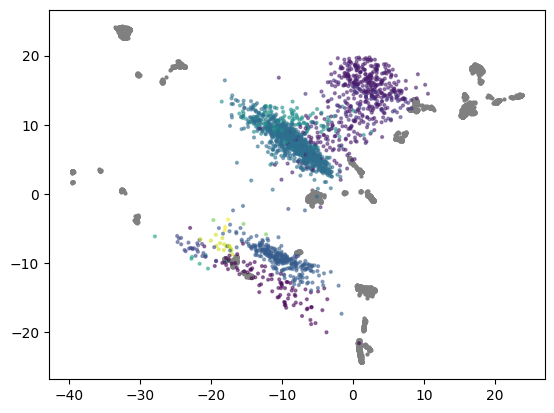

In [61]:


n_samples = X.shape[0]

with h5.File(f'datasets/truth/pancreas_{n_samples}.h5', 'w') as f:
    gE = f.create_group('E')
    gO = f.create_group('O')
    gE.create_dataset('X0', data=X_train)
    gO.create_dataset('X0', data=X_test)
    gE.create_dataset('y0', data=y_train)
    gO.create_dataset('y0', data=y_test)

pumap = ParametricUMAP(n_components=2)
proj_train = pumap.fit_transform(X_train, )
proj_test = pumap.transform(X_test)

plt.scatter(proj_train[:, 0], proj_train[:, 1], s=4, c='gray')
plt.scatter(proj_test[:, 0], proj_test[:, 1], s=4, c=y_test, alpha=0.5)


# Retina

In [11]:
import scanpy as sc
import pandas as pd

b1path = 'org_datasets/retina/b1_exprs.txt'
adata1 = sc.read_text(b1path, delimiter='\t', first_column_names=True, dtype='float64')
print(adata1) 
adata1 = adata1.transpose()
sc.pp.normalize_per_cell(adata1)
sc.pp.log1p(adata1)
print(adata1.obs_names[0:3])
print(adata1.var_names[0:3])

AnnData object with n_obs × n_vars = 12333 × 26830
Index(['Bipolar1_CCCACAAGACTA', 'Bipolar1_CAAAGCATTTGC',
       'Bipolar1_CTTTTGATTGAC'],
      dtype='object')
Index(['0610007P14Rik', '0610009B22Rik', '0610009E02Rik'], dtype='object')


## Retina1 数据维度为12333

## Retina2 数据维度为12333

In [5]:

cell_info1 = "org_datasets/retina/b1_celltype.txt"
sample_adata1 = pd.read_csv(cell_info1,header=0, index_col=0, sep='\t')
print(sample_adata1.values.shape)
print(sample_adata1.keys())
print(sample_adata1.index)

print(adata1.obs_names)

(26830, 1)
Index(['CellType'], dtype='object')
Index(['Bipolar1_CCCACAAGACTA', 'Bipolar1_CAAAGCATTTGC',
       'Bipolar1_CTTTTGATTGAC', 'Bipolar1_GCTCCAATGACA',
       'Bipolar1_AAATACCCTCAT', 'Bipolar1_TGCATGCGTCCA',
       'Bipolar1_TTCCGGCTTTTC', 'Bipolar1_CAACGTATCCTT',
       'Bipolar1_CATCGAACGACG', 'Bipolar1_ACCGGAAGTCCA',
       ...
       'Bipolar6_GCAGGCCAGTGA', 'Bipolar6_GGACCCGTTAAA',
       'Bipolar6_GACCCGCTCATA', 'Bipolar6_GAGGATTGTCTT',
       'Bipolar6_GACGTGTTCGGA', 'Bipolar6_GGATCTTTCCAG',
       'Bipolar6_GACCCTATTCGT', 'Bipolar6_GGTCTCTGAGCC',
       'Bipolar6_GATGTGCTTATT', 'Bipolar6_GTAATCGGAACC'],
      dtype='object', name='CellId', length=26830)
Index(['Bipolar1_CCCACAAGACTA', 'Bipolar1_CAAAGCATTTGC',
       'Bipolar1_CTTTTGATTGAC', 'Bipolar1_GCTCCAATGACA',
       'Bipolar1_AAATACCCTCAT', 'Bipolar1_TGCATGCGTCCA',
       'Bipolar1_TTCCGGCTTTTC', 'Bipolar1_CAACGTATCCTT',
       'Bipolar1_CATCGAACGACG', 'Bipolar1_ACCGGAAGTCCA',
       ...
       'Bipolar6_GCAGGCC

In [9]:
adata1.obs['CellType'] = sample_adata1.loc[adata1.obs_names, "CellType"]
print(len(adata1.obs['CellType']))

26830


In [17]:

y = adata1.obs['CellType'].factorize()[0]

print(y.shape)

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
X = adata1.X
X, _, y,_, = train_test_split(X, y, train_size=0.2, random_state=100, stratify=y)

X = PCA(n_components=50).fit_transform(X)

X_train = X
y_train = y

print(X_train.shape)

import h5py as h5
with h5.File('org_datasets/retina/retina1.h5', 'w') as f:
    f.create_dataset('X_train', data=X_train)
    f.create_dataset('y_train', data=y_train)

# X_test = X[batch >= 2]
# y_test = y[batch >= 2]

# print(X_train.shape, X_test.shape)

(26830,)
(5366, 50)


AttributeError: module 'h5py.h5' has no attribute 'File'

In [12]:
import scanpy as sc
import pandas as pd

b2path = 'org_datasets/retina/b2_exprs.txt'
adata2 = sc.read_text(b2path, delimiter='\t', first_column_names=True, dtype='float64')
print(adata2)
# adata2 = adata2.transpose()
# sc.pp.normalize_per_cell(adata2)
# sc.pp.log1p(adata2)
# print(adata2.obs_names[0:3])
# print(adata2.var_names[0:3])

# cell_info2 = "org_datasets/retina/b2_celltype.txt"
# sample_adata2 = pd.read_csv(cell_info2,header=0, index_col=0, sep='\t')
# print(sample_adata2.values.shape)
# print(sample_adata2.keys())
# print(sample_adata2.index)

# adata2.obs['CellType'] = sample_adata2.loc[adata2.obs_names, "CellType"]
# print(len(adata2.obs['CellType']))

AnnData object with n_obs × n_vars = 12333 × 44808


In [24]:

y = adata2.obs['CellType'].factorize()[0]

print(y.shape)

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
X = adata2.X
X, _, y,_, = train_test_split(X, y, train_size=0.05, random_state=100, stratify=y)

X = PCA(n_components=50).fit_transform(X)

X_test = X
y_test = y

print(X_test.shape)

import h5py as h5
with h5.File('org_datasets/retina/retina2.h5', 'w') as f:
    f.create_dataset('X_test', data=X_test)
    f.create_dataset('y_test', data=y_test)


(44808,)
(2240, 50)


In [25]:
import h5py as h5
with h5.File('org_datasets/retina/retina1.h5', 'r') as f:
    train_X = np.array(f['X_train'])
    train_y = np.array(f['y_train'])

with h5.File('org_datasets/retina/retina2.h5', 'r') as f:
    test_X = np.array(f['X_test'])
    test_y = np.array(f['y_test'])

 
n_samples = train_X.shape[0] + test_X.shape[0]

with h5.File(f'datasets/truth/retina_{n_samples}.h5', 'w') as f:
    gE = f.create_group('E')
    gO = f.create_group('O')
    gE.create_dataset('X0', data=train_X)
    gO.create_dataset('X0', data=test_X)
    gE.create_dataset('y0', data=train_y)
    gO.create_dataset('y0', data=test_y)


In [27]:
from umap import ParametricUMAP
pumap = ParametricUMAP(n_components=2)
proj_train = pumap.fit_transform(train_X)
proj_test = pumap.transform(test_X)

plt.scatter(proj_train[:, 0], proj_train[:, 1], s=4, c='gray')
plt.scatter(proj_test[:, 0], proj_test[:, 1], s=4, c=test_y, alpha=0.5)


c:\Users\60946\dev_env\lib\site-packages\umap\parametric_umap.py:148: UserWarning: tensorflow_probability not installed or incompatible to current                 tensorflow installation. Setting global_correlation_loss_weight to zero.
  warn(


Epoch 1/10
 323/1926 [====>.........................] - ETA: 3:28 - loss: 0.2454

KeyboardInterrupt: 

# 统计每个真实数据集的特征

In [10]:
from glob import glob
import os
import h5py as h5
import numpy as np

print(f"Dataset\tname\tn_sam\tn_dims")
for filename in glob('datasets/truth/*.h5'):
    with h5.File(filename, 'r') as f:
        gE = f['E']
        gO = f['O']
        X_train = np.array(gE['X0'])
        X_test = np.array(gO['X0'])
        n_samples = X_train.shape[0] + X_test.shape[0]
        n_dims = X_train.shape[1]
        print(f"Dataset\t{os.path.basename(filename)[:5]}\t{n_samples}\t{n_dims}")


Dataset	name	n_sam	n_dims
Dataset	cifar	3250	1024
Dataset	cnae9	1080	856
Dataset	dendr	576	50
Dataset	fashi	4200	784
Dataset	freyF	1965	560
Dataset	imdb_	5000	700
Dataset	isoma	698	512
Dataset	pancr	7383	50
Dataset	retin	7606	50


In [3]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import h5py as h5
import glob
from tqdm import tqdm

pos_files = glob.glob("org_datasets/aclImdb/train/pos/*.txt")
pos_comments = []
neg_files = glob.glob("org_datasets/aclImdb/train/neg/*.txt")
neg_comments = []
for pf in tqdm(pos_files, desc="Reading Positive", ncols=100, unit="txt"):
    with open(pf, 'r', encoding='utf-8') as f:
        pos_comments.append(' '.join(f.readlines()))
for nf in tqdm(neg_files, desc="Reading Negative", ncols=100, unit="txt"):
    with open(nf, 'r', encoding='utf-8') as f:
        neg_comments.append(' '.join(f.readlines()))



Reading Negative: 100%|███████████████████████████████████| 12500/12500 [00:01<00:00, 12033.45txt/s]


In [4]:
print(f"Positive: {len(pos_comments)}\tNegative: {len(neg_comments)}")

with h5.File('org_datasets/aclImdb/aclImdb_train.h5', 'w') as f:
    f.create_dataset('pos', data=pos_comments)
    f.create_dataset('neg', data=neg_comments)


Positive: 12500	Negative: 12500


In [3]:

pos_files = glob.glob("org_datasets/aclImdb/test/pos/*.txt")
pos_comments = []
neg_files = glob.glob("org_datasets/aclImdb/test/neg/*.txt")
neg_comments = []
for pf in tqdm(pos_files, desc="Reading Positive", ncols=100, unit="txt"):
    with open(pf, 'r', encoding='utf-8') as f:
        pos_comments.append(' '.join(f.readlines()))
for nf in tqdm(neg_files, desc="Reading Negative", ncols=100, unit="txt"):
    with open(nf, 'r', encoding='utf-8') as f:
        neg_comments.append(' '.join(f.readlines()))


Reading Negative: 100%|███████████████████████████████████████| 5985/5985 [00:32<00:00, 182.80txt/s]


In [4]:

with h5.File('org_datasets/aclImdb/aclImdb_test.h5', 'w') as f:
    f.create_dataset('pos', data=pos_comments)
    f.create_dataset('neg', data=neg_comments)


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import h5py as h5
import matplotlib.pyplot as plt
from tqdm import tqdm

with h5.File('org_datasets/aclImdb/aclImdb_train.h5', 'r') as f:
    pos_comments = list(f['pos'])
    neg_comments = list(f['neg'])

comments = pos_comments + neg_comments
y_train = np.zeros((len(comments),)).astype('uint8')
y_train[:len(pos_comments)] = 1
tfidf = TfidfVectorizer(strip_accents='ascii',
                        stop_words='english', max_features=700)
X_train = tfidf.fit_transform(comments).todense()

with h5.File('org_datasets/aclImdb/aclImdb_test.h5', 'r') as f:
    pos_comments = list(f['pos'])
    neg_comments = list(f['neg'])

comments = pos_comments + neg_comments
y_test = np.zeros((len(comments),)).astype('uint8')
y_test[:len(pos_comments)] = 1
tfidf = TfidfVectorizer(strip_accents='ascii',
                        stop_words='english', max_features=700)
X_test = tfidf.fit_transform(comments).todense()



In [ ]:

from methods.methods import Methods

# method_name = 'ptsne22'
method_name = 'cdr'
methods = Methods(verbose=True)
method = methods.get(method_name)

method.fit(np.array(X_train))
proj_train = method.transform(np.array(X_train))
proj_test  = method.transform_oos(np.array(X_test))


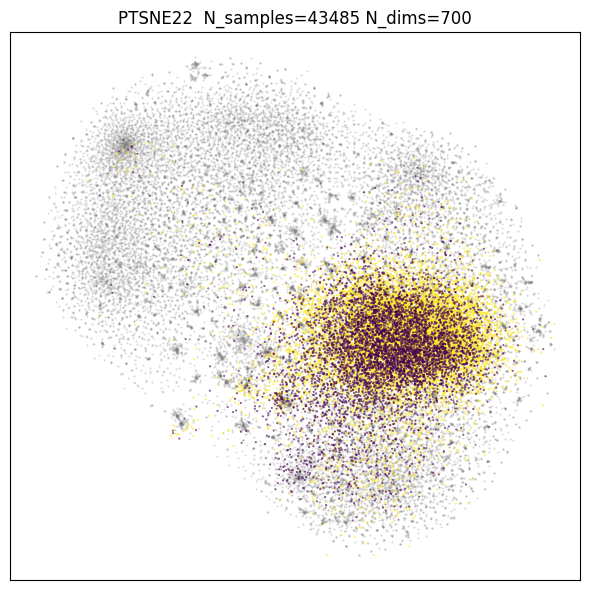

In [37]:
fig = plt.figure(figsize=(6, 6))
plot = fig.add_subplot(111)
plot.scatter(proj_train[:, 0], proj_train[:, 1], s=1, marker='.', c='gray', alpha=0.3)
plot.scatter(proj_test[:, 0], proj_test[:, 1], s=1, marker='.', c=y_test, alpha=0.7)
plot.set_xticks([])
plot.set_yticks([])
plot.set_title(f'{method_name} N_samples={proj_train.shape[0] + proj_test.shape[0]} N_dims={X_train.shape[1]}')
fig.tight_layout()
fig.savefig('imgs/imdb-all-ptsne22.png', dpi=500)



# RAiD Dataset

In [1]:
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt

with h5.File('org_datasets/RAiD/RAiD_4Cams.mat', 'r') as f:
    cam = f['dataset']['cam'][:]
    images = f['dataset']['images'][:]
    images = np.transpose(images, axes=(0, 3, 2, 1))
    print(images.shape)
    images = np.reshape(images, (images.shape[0], -1))

    name = f['dataset']['name'][:].squeeze()
    personID = f['dataset']['personID'][:].squeeze()
    # keys: ['cam', 'count', 'images', 'masks', 'name', 'peopleCount', 'personID', 'personSubsetImageIndex']

cam1_idx = np.argwhere(cam == 1)[:,0]
cam2_idx = np.argwhere(cam == 2)[:,0]
cam3_idx = np.argwhere(cam == 3)[:,0]
cam4_idx = np.argwhere(cam == 4)[:,0]

cam124_idx = np.union1d(cam1_idx, np.union1d(cam2_idx, cam4_idx))

persons = np.unique(personID)
persons_id = np.random.choice(persons, 12, replace=False)
person_idx = np.argwhere(np.isin(personID, persons_id))

person_cam124_idx = np.intersect1d(person_idx, cam124_idx)
person_cam3_idx = np.intersect1d(person_idx, cam3_idx)

X_train = images[person_cam124_idx]
X_test  = images[person_cam3_idx]
y_train = personID[person_cam124_idx]
y_test  = personID[person_cam3_idx]


(6920, 128, 64, 3)


Using ResNetV2 to extract features

In [2]:
import cv2
from keras.applications import inception_resnet_v2

# height, width, channels
scale_shape = (128, 75, 3)

X = np.vstack((X_train, X_test))
img_scale= np.zeros((X.shape[0], scale_shape[0], scale_shape[1], scale_shape[2]))
for xi, x in enumerate(X):
    img = x.reshape(128, 64, 3)
    img = cv2.resize(img, dsize=(scale_shape[1], scale_shape[0]))
    img_scale[xi] = img

print('X shape:', img_scale.shape)

model = inception_resnet_v2.InceptionResNetV2(
    include_top=False, weights='imagenet', input_shape=scale_shape, pooling='max')

img_scale /= 255.0
img_feature = model.predict(img_scale)


X shape: (1945, 128, 75, 3)


: 

In [35]:
X_train = img_feature[:X_train.shape[0]]
X_test  = img_feature[X_train.shape[0]:]

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

with h5.File(f'datasets/truth/raid_{X_train.shape[0]+X_test.shape[0]}.h5', 'w') as f:
    gE = f.create_group('E')
    gO = f.create_group('O')
    gE.create_dataset('X0', data=X_train)
    gO.create_dataset('X0', data=X_test)
    gE.create_dataset('y0', data=y_train)
    gO.create_dataset('y0', data=y_test)


X_train shape: (1355, 1536)
X_test shape: (600, 1536)


In [2]:
from methods.methods import *
import matplotlib.pyplot as plt
import h5py as h5
with h5.File(f'datasets/truth/raid_1955.h5', 'r') as f:
    gE = f['E']
    gO = f['O']
    X_train=gE['X0'][:]
    X_test=gO['X0'][:]
    y_train=gE['y0'][:]
    y_test=gO['y0'][:]

from methods.methods import *
methods_name = ['pca', 'cdr', 'ptsne22', 'pumap', 'dlmp-tsne', 'dlmp-umap']
methods = Methods(verbose=True)

projects=[]

for method in methods_name:
    print('method:', method)
    dr = methods.get(method)
    dr.fit(X_train)
    proj_train = dr.transform(X_train)
    proj_test = dr.transform_oos(X_test)
    projects.append((proj_train, proj_test))



2024-10-11 17:40:37,601 - INFO - Start train for Visualize


method: pca
method: cdr


2024-10-11 17:40:49,659 - INFO - successfully compute approximate neighbor_graph
2024-10-11 17:40:50,986 - INFO - Start Training for 1000 Epochs
2024-10-11 17:40:50,986 - INFO - Experiment Configurations: 
Epochs: 1000 Batch Size: 135 
Learning rate: 0.001000 Optimizer: adam

2024-10-11 17:40:50,986 - INFO - Start Training for 1000 Epochs
2024-10-11 17:41:00,857 - INFO - Epoch 100/1000, Train Loss: 2.42296, 
2024-10-11 17:41:10,197 - INFO - Epoch 200/1000, Train Loss: 2.47496, 
2024-10-11 17:41:19,948 - INFO - Epoch 300/1000, Train Loss: 2.42595, 
2024-10-11 17:41:30,115 - INFO - Epoch 400/1000, Train Loss: 2.35369, 
2024-10-11 17:41:39,795 - INFO - Epoch 500/1000, Train Loss: 2.34984, 
2024-10-11 17:41:49,361 - INFO - Epoch 600/1000, Train Loss: 2.40190, 
2024-10-11 17:41:58,884 - INFO - Epoch 700/1000, Train Loss: 2.31183, 
2024-10-11 17:42:08,433 - INFO - Epoch 800/1000, Train Loss: 2.42358, 
2024-10-11 17:42:17,797 - INFO - Epoch 900/1000, Train Loss: 2.39964, 
2024-10-11 17:42:26,

method: ptsne22
perplexity: 30
calc P


2024-10-11 17:42:27,191 - INFO - Precomputed initialization provided. Ignoring initalization-related parameters.


Trying to put X into GPU
optimizing...


Processing epoch 1000/1000 loss : -0.03178 time : 0.00287s: 100%|██████████| 1000/1000 [00:33<00:00, 30.13it/s]


method: pumap
ParametricUMAP(batch_size=135, loss_report_frequency=1, optimizer=<keras.optimizers.optimizer_v2.adam.Adam object at 0x000002655B312190>)
Fri Oct 11 17:43:00 2024 Construct fuzzy simplicial set
Fri Oct 11 17:43:01 2024 Finding Nearest Neighbors
Fri Oct 11 17:43:03 2024 Finished Nearest Neighbor Search
Fri Oct 11 17:43:05 2024 Construct embedding
43/43 [==============================] - 0s 785us/step
Fri Oct 11 17:44:34 2024 Finished embedding
5/5 [==============================] - 0s 0s/step
method: dlmp-tsne
Epoch 1/1000
10/10 [==============================] - 0s 19ms/step - loss: 0.0463 - val_loss: 0.0786
Epoch 2/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0170 - val_loss: 0.0139
Epoch 3/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.0083 - val_loss: 0.0173
Epoch 4/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.0045 - val_loss: 0.0082
Epoch 5/1000
10/10 [==============================] - 0s 6ms/step - lo

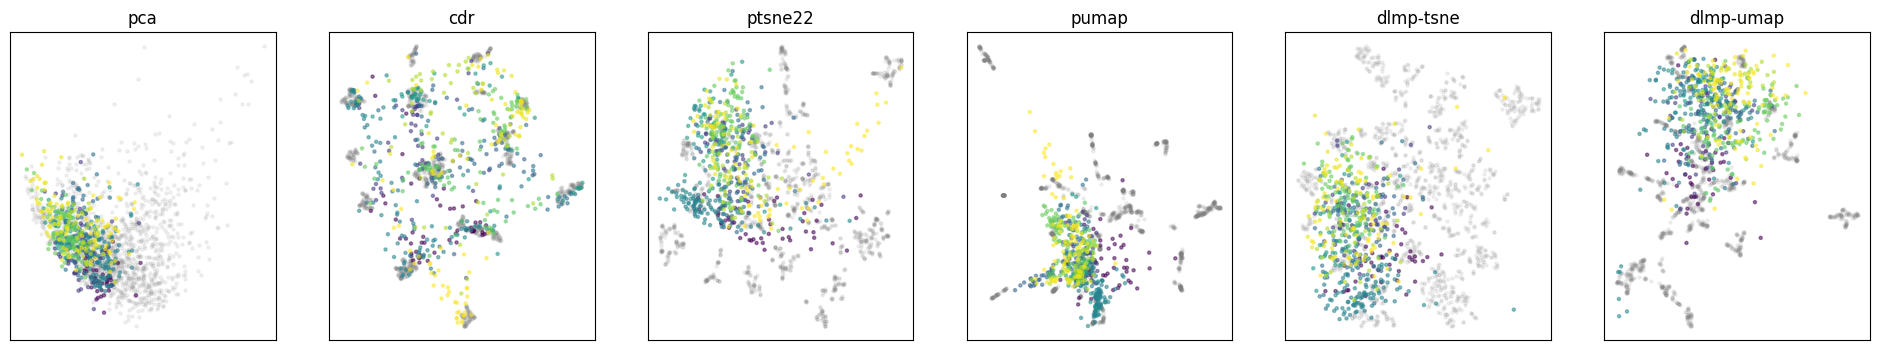

In [3]:
ncols = len(methods_name)
fig, ax = plt.subplots(1, ncols, figsize=(4*ncols, 4))
for i, (ptrain, ptest) in enumerate(projects):
    ax[i].scatter(ptrain[:,0],ptrain[:,1],c='gray', s=5, alpha=0.1)
    ax[i].scatter(ptest[:,0],ptest[:,1],c=y_test, s=5, alpha=0.5)
    ax[i].set_title(methods_name[i])
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()


## Gas Sensor Array Drift Dataset

In [79]:
import h5py as h5
import pandas as pd
import numpy as np

for i in range(1, 11):
    df = pd.read_csv(f'org_datasets/sensor/batch{i}.dat', sep=' ', header=None)
    df.loc[:][0]
    indices = df.loc[:][0]
    label=[]
    for idx in indices:
        label.append(int(idx.split(';')[0]))
    label=np.array(label)
    
    values = df.loc[:].values[:,1:-1]
    X=[]
    for value in values:
        x = []
        for v in value:
            x.append(float(v.split(':')[1]))
        X.append(np.array(x))
    X=np.array(X)
    print('batch:', i, 'n_label:', np.unique(label).shape[0], 'shape:', X.shape)
    with h5.File(f'org_datasets/sensor/batch{i}.h5', 'w') as f:
        f.create_dataset('X', data=X)
        f.create_dataset('y', data=label)


batch: 1 n_label: 6 shape: (445, 128)
batch: 2 n_label: 6 shape: (1244, 128)
batch: 3 n_label: 5 shape: (1586, 128)
batch: 4 n_label: 5 shape: (161, 128)
batch: 5 n_label: 5 shape: (197, 128)
batch: 6 n_label: 6 shape: (2300, 128)
batch: 7 n_label: 6 shape: (3613, 128)
batch: 8 n_label: 6 shape: (294, 128)
batch: 9 n_label: 6 shape: (470, 128)
batch: 10 n_label: 6 shape: (3600, 128)


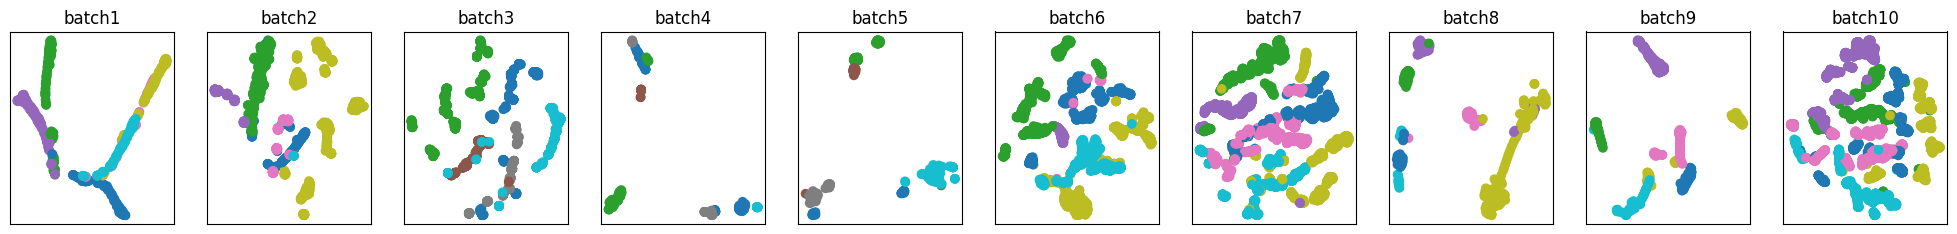

In [84]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 10, figsize=(10*2.5, 2.5))

for i in range(0, 10):
    with h5.File(f'org_datasets/sensor/batch{i+1}.h5', 'r') as f:
        X = f['X'][:]
        y = f['y'][:]
        dr = TSNE(n_components=2)
        proj = dr.fit_transform(X)
        ax[i].scatter(proj[:, 0], proj[:, 1], c=y, cmap='tab10')
        ax[i].set_title(f'batch{i+1}')
        ax[i].set_xticks([])
        ax[i].set_yticks([])

plt.show()

In [4]:
import h5py as h5
from sklearn.preprocessing import StandardScaler
with h5.File(f'org_datasets/sensor/batch{7}.h5', 'r') as f:
    X_train = f['X'][:]
    y_train = f['y'][:]
    X_train = StandardScaler().fit_transform(X_train)
    

with h5.File(f'org_datasets/sensor/batch{10}.h5', 'r') as f:
    X_test = f['X'][:]
    y_test = f['y'][:]
    X_test = StandardScaler().fit_transform(X_test)


with h5.File(f'datasets/truth/sensor_{X_train.shape[0] + X_test.shape[0]}.h5', 'w') as f:
    gE = f.create_group('E')
    gO = f.create_group('O')
    gE.create_dataset('X0', data=X_train)
    gO.create_dataset('X0', data=X_test)
    gE.create_dataset('y0', data=y_train)
    gO.create_dataset('y0', data=y_test)
    


In [43]:
from methods.methods import *
methods_name = ['pca', 'cdr', 'ptsne22', 'pumap', 'dlmp-tsne', 'dlmp-umap']
methods = Methods(verbose=True)

projects=[]

for method in methods_name:
    print('method:', method)
    dr = methods.get(method)
    dr.fit(X_train)
    proj_train = dr.transform(X_train)
    proj_test = dr.transform_oos(X_test)
    projects.append((proj_train, proj_test))


2024-10-11 16:47:20,609 - INFO - Start train for Visualize
2024-10-11 16:47:20,722 - INFO - successfully compute approximate neighbor_graph


method: pca
method: cdr


2024-10-11 16:47:23,963 - INFO - Start Training for 1000 Epochs
2024-10-11 16:47:23,963 - INFO - Experiment Configurations: 
Epochs: 1000 Batch Size: 361 
Learning rate: 0.001000 Optimizer: adam

2024-10-11 16:47:23,963 - INFO - Start Training for 1000 Epochs
2024-10-11 16:47:41,169 - INFO - Epoch 100/1000, Train Loss: 2.10231, 
2024-10-11 16:47:57,709 - INFO - Epoch 200/1000, Train Loss: 2.07986, 
2024-10-11 16:48:14,535 - INFO - Epoch 300/1000, Train Loss: 2.09400, 
2024-10-11 16:48:31,162 - INFO - Epoch 400/1000, Train Loss: 2.07556, 
2024-10-11 16:48:47,720 - INFO - Epoch 500/1000, Train Loss: 2.06703, 
2024-10-11 16:49:04,502 - INFO - Epoch 600/1000, Train Loss: 2.04247, 
2024-10-11 16:49:20,999 - INFO - Epoch 700/1000, Train Loss: 2.04152, 
2024-10-11 16:49:37,814 - INFO - Epoch 800/1000, Train Loss: 2.02620, 
2024-10-11 16:49:54,249 - INFO - Epoch 900/1000, Train Loss: 2.03718, 
2024-10-11 16:50:10,022 - INFO - Epoch 1000/1000, Train Loss: 2.00734, 


method: ptsne22
perplexity: 30
calc P


2024-10-11 16:50:10,776 - INFO - Precomputed initialization provided. Ignoring initalization-related parameters.


Trying to put X into GPU
optimizing...


Processing epoch 1000/1000 loss : -0.03435 time : 0.00378s: 100%|██████████| 1000/1000 [00:43<00:00, 23.20it/s]


method: pumap
ParametricUMAP(batch_size=361, loss_report_frequency=1, optimizer=<keras.optimizers.optimizer_v2.adam.Adam object at 0x000002AFDB0DD280>)
Fri Oct 11 16:50:53 2024 Construct fuzzy simplicial set
Fri Oct 11 16:50:57 2024 Finding Nearest Neighbors
Fri Oct 11 16:50:58 2024 Finished Nearest Neighbor Search
Fri Oct 11 16:50:58 2024 Construct embedding
113/113 [==============================] - 0s 730us/step
Fri Oct 11 16:52:22 2024 Finished embedding
10/10 [==============================] - 0s 1ms/step
method: dlmp-tsne
Epoch 1/1000
10/10 [==============================] - 0s 22ms/step - loss: 0.0514 - val_loss: 0.0203
Epoch 2/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0209 - val_loss: 0.0125
Epoch 3/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0087 - val_loss: 0.0063
Epoch 4/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0048 - val_loss: 0.0055
Epoch 5/1000
10/10 [==============================] - 0s 7ms/s

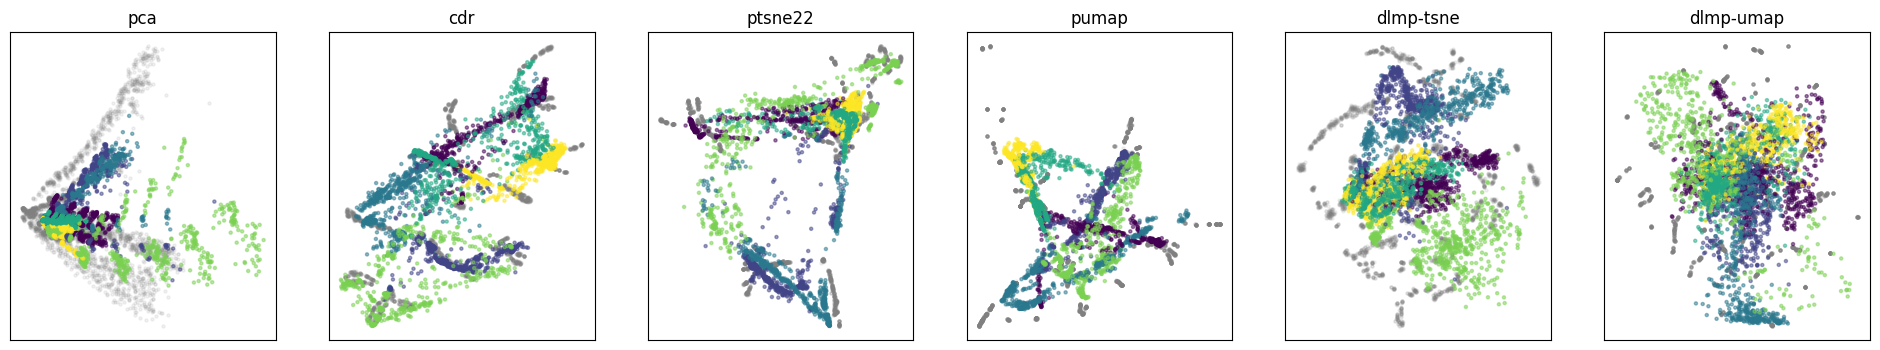

In [44]:
import matplotlib.pyplot as plt
ncols = len(methods_name)
fig, ax = plt.subplots(1, ncols, figsize=(4*ncols, 4))
for i, (ptrain, ptest) in enumerate(projects):
    ax[i].scatter(ptrain[:,0],ptrain[:,1],c='gray', s=5, alpha=0.1)
    ax[i].scatter(ptest[:,0],ptest[:,1],c=y_test, s=5, alpha=0.5)
    ax[i].set_title(methods_name[i])
    ax[i].set_xticks([])
    ax[i].set_yticks([])

    


## Merchant Dataset

In [11]:
import pandas as pd
import numpy as np
import h5py as h5
from sklearn.feature_extraction.text import TfidfVectorizer

data = pd.read_csv("org_datasets/merchant/merchant.csv", sep=',')

merchants = data['Merchant ID'].value_counts()[:].to_dict()
merchant_ids = list(merchants.keys())
print("max count merchant:", merchants)

title_train = data[data['Merchant ID'] == merchant_ids[0]]["Product Title"].values.tolist()
y_train = data[data['Merchant ID'] == merchant_ids[0]]["Category ID"].values

title_test = data[data['Merchant ID'] == merchant_ids[3]]["Product Title"].values.tolist()
y_test = data[data['Merchant ID'] == merchant_ids[3]]["Category ID"].values

titles = title_train + title_test

# y_unique, count = np.unique(y_train, return_counts=True)
# y_count = dict(zip(y_unique, count))
# y_count = sorted(y_count.items(), key=lambda x: x[1], reverse=True)
# print("Categories:", y_count[:])

# y_unique, count = np.unique(y_test, return_counts=True)
# y_count = dict(zip(y_unique, count))
# y_count = sorted(y_count.items(), key=lambda x: x[1], reverse=True)
# print("Categories:", y_count[:])

tfidf = TfidfVectorizer(strip_accents='ascii', stop_words='english', max_features=150)
X = tfidf.fit_transform(titles).todense()

X_train = np.array(X[:len(title_train)])
X_test = np.array(X[len(title_train):])
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

with h5.File(f'datasets/truth/merchant_{X.shape[0]}.h5', 'w') as f:
    gE = f.create_group("E")
    gO = f.create_group("O")
    gE.create_dataset("X0", data=X_train)
    gO.create_dataset("X0", data=X_test)
    gE.create_dataset("y0", data=y_train)
    gO.create_dataset("y0", data=y_test)


max count merchant: {3: 2547, 6: 1591, 298: 1523, 31: 1350, 119: 1239, 7: 1204, 17: 1193, 293: 1177, 294: 1000, 301: 901, 22: 860, 131: 760, 300: 736, 14: 699, 48: 663, 15: 661, 125: 642, 98: 593, 128: 583, 64: 582, 51: 576, 123: 570, 4: 406, 130: 405, 324: 390, 2: 383, 347: 374, 18: 364, 121: 334, 53: 330, 73: 313, 134: 304, 66: 303, 36: 255, 179: 247, 45: 230, 297: 225, 41: 222, 32: 221, 129: 214, 88: 212, 124: 207, 1: 206, 132: 205, 314: 203, 5: 184, 42: 179, 289: 173, 258: 171, 30: 165, 292: 154, 75: 149, 26: 148, 332: 148, 250: 143, 24: 141, 295: 141, 133: 140, 16: 136, 8: 134, 253: 126, 137: 126, 62: 123, 313: 121, 43: 120, 49: 107, 305: 100, 11: 99, 13: 98, 79: 95, 341: 92, 21: 87, 10: 82, 257: 80, 153: 79, 126: 76, 60: 74, 315: 73, 87: 69, 180: 68, 156: 60, 44: 60, 328: 60, 330: 59, 19: 57, 82: 56, 52: 55, 147: 55, 251: 54, 186: 54, 247: 54, 309: 52, 307: 51, 344: 50, 40: 49, 299: 49, 163: 48, 59: 47, 99: 46, 162: 43, 249: 43, 165: 42, 178: 42, 33: 42, 161: 41, 350: 39, 308: 38

In [4]:
import h5py as h5
with h5.File('datasets/truth/merchant_3897.h5', 'r') as f:
    gE = f["E"]
    gO = f["O"]
    X_train = gE['X0'][:]
    X_test =  gO['X0'][:]
    y_train = gE['y0'][:]
    y_test =  gO['y0'][:]

In [5]:
from methods.methods import *
methods = Methods(verbose=True, gpu_accel=True)
methods_name = ['mimds', 'kmds']

projects=[]

for method in methods_name:
    print('method:', method)
    dr = methods.get(method)
    dr.fit(X_train)
    proj_train = dr.transform(X_train)
    proj_test = dr.transform_oos(X_test)
    projects.append((proj_train, proj_test))


2024-10-23 15:04:31,859 - INFO - init
2024-10-23 15:04:33,393 - INFO - add pending dealloc: cuMemFree_v2 1018800 bytes
2024-10-23 15:04:33,393 - INFO - add pending dealloc: cuStreamDestroy_v2 ? bytes
2024-10-23 15:04:33,393 - INFO - add pending dealloc: cuMemFree_v2 12969324 bytes


method: mimds


d:\.virtualenvs\OOS-DR-Benchmark-G9pgzYZ0\lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 65 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
d:\.virtualenvs\OOS-DR-Benchmark-G9pgzYZ0\lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 33 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
d:\.virtualenvs\OOS-DR-Benchmark-G9pgzYZ0\lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 17 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
d:\.virtualenvs\OOS-DR-Benchmark-G9pgzYZ0\lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 9 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
d:\.virtualenvs\OOS-DR-Benchmark-G9pgzYZ0\lib\site-packages\numba\cuda\dispat

mi-mds interpolating: computing knn and pairwise distances


100%|██████████| 1000/1000 [02:49<00:00,  5.89it/s, loss=1.50534]  
2024-10-23 15:07:26,255 - INFO - add pending dealloc: cuMemFree_v2 1018800 bytes
2024-10-23 15:07:26,255 - INFO - add pending dealloc: cuStreamDestroy_v2 ? bytes
2024-10-23 15:07:26,255 - INFO - add pending dealloc: cuMemFree_v2 12969324 bytes


method: kmds


2024-10-23 15:07:26,772 - INFO - add pending dealloc: cuMemFree_v2 20376 bytes
2024-10-23 15:07:26,773 - INFO - add pending dealloc: cuMemFree_v2 12969324 bytes
2024-10-23 15:07:26,773 - INFO - add pending dealloc: cuStreamDestroy_v2 ? bytes
2024-10-23 15:07:26,774 - INFO - add pending dealloc: cuMemFree_v2 12969324 bytes
2024-10-23 15:07:27,165 - INFO - add pending dealloc: cuMemFree_v2 20376 bytes
2024-10-23 15:07:27,165 - INFO - add pending dealloc: cuMemFree_v2 12969324 bytes
2024-10-23 15:07:27,165 - INFO - add pending dealloc: cuStreamDestroy_v2 ? bytes
2024-10-23 15:07:27,165 - INFO - add pending dealloc: cuMemFree_v2 12969324 bytes
2024-10-23 15:07:27,171 - INFO - dealloc: cuMemFree_v2 20376 bytes
2024-10-23 15:07:27,171 - INFO - dealloc: cuMemFree_v2 12969324 bytes
2024-10-23 15:07:27,171 - INFO - dealloc: cuMemFree_v2 12969324 bytes
2024-10-23 15:07:27,171 - INFO - dealloc: cuMemFree_v2 1018800 bytes
2024-10-23 15:07:27,171 - INFO - dealloc: cuMemFree_v2 12969324 bytes
2024-1

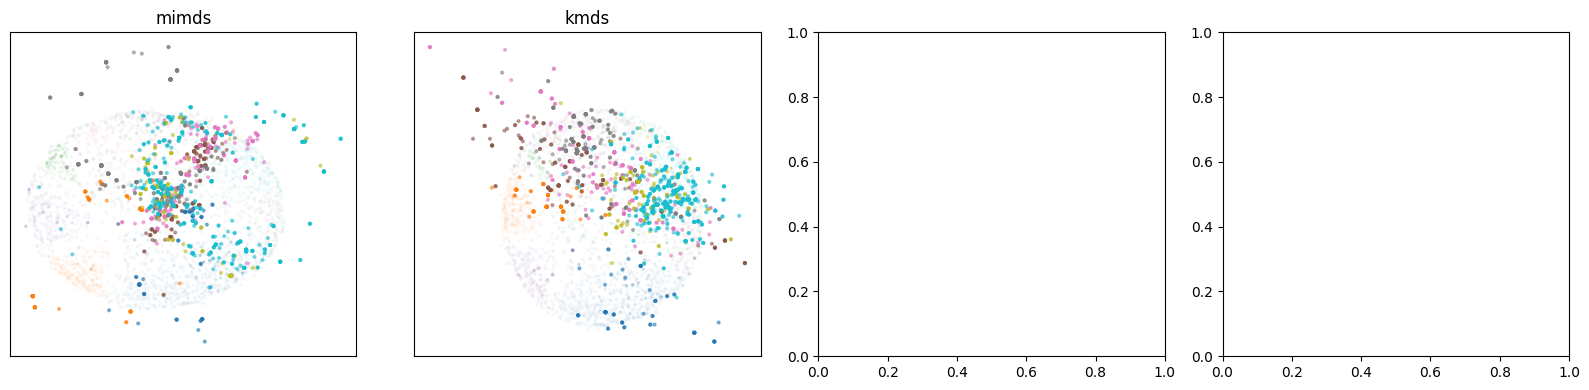

In [10]:
import matplotlib.pyplot as plt
ncols = 4
nrows = int(np.ceil(len(methods_name) / ncols))

fig, ax = plt.subplots(nrows, ncols, figsize=(4 * ncols, 4 * nrows))
for i, (ptrain, ptest) in enumerate(projects):
    r = i // nrows
    c = i % ncols
    axes = ax[r, c] if ncols > 1 and nrows > 1 else ax[i]
    axes.scatter(ptrain[:,0],ptrain[:,1],c=y_train, cmap='tab10', s=3, alpha=0.03)
    axes.scatter(ptest[:,0],ptest[:,1],c=y_test, cmap='tab10', s=4, alpha=0.5)
    axes.set_title(methods_name[i])
    axes.set_xticks([])
    axes.set_yticks([])
fig.tight_layout()
fig.savefig('imgs/merchant.png', dpi=400)
    
    


## Coil20

In [1]:
import imageio
import numpy as np
from glob import glob
import os

files = glob('org_datasets/coil20/coil20/*.png')

images = []
labels = []
poses  = []

for file in files:
    basename = os.path.basename(file)
    filename = os.path.splitext(basename)[0]
    [obj_name, pose_id] = filename.split('__')
    images.append(imageio.imread(file))
    labels.append(int(obj_name.split('obj')[1]))
    poses.append(int(pose_id))

images = np.array(images, dtype=np.float64)
labels = np.array(labels)
poses  = np.array(poses)

print(images.shape, labels.shape, poses.shape)

C:\Users\liu44\AppData\Local\Temp\ipykernel_19940\836887154.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file))


(1440, 128, 128) (1440,) (1440,)


In [2]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.decomposition import PCA

# from keras.applications import inception_resnet_v2
# rgb_images = np.expand_dims(images, axis=3).repeat(3, axis=3)
# model = inception_resnet_v2.InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(128, 128, 3), pooling='max')
# rgb_images /= 255.0
# X = model.predict(rgb_images)


In [64]:
from sklearn.model_selection import train_test_split
X = images.reshape(images.shape[0], -1)
X = PCA(n_components=50).fit_transform(X)

# idx_train = poses < 72/1.6
# idx_test  = poses >= 72/1.4

# X_train = X[idx_train]
# y_train = labels[idx_train]
# ypose_train = poses[idx_train]

# X_test = X[idx_test]
# y_test = labels[idx_test]
# ypose_test = poses[idx_test]

X_train, X_test, y_train, y_test, ypose_train, ypose_test = train_test_split(X, labels, poses, train_size=0.7, stratify=labels, random_state=100)

from utils import save_dataset

save_dataset(f'datasets/truth/coil20_{X_train.shape[0] + X_test.shape[0]}.h5', X_train, X_test, y_train, y_test)

In [65]:
from methods.methods import *
from tqdm import tqdm
methods = Methods(gpu_accel=True)
methods_name = methods.available()
projects = []
for m in tqdm(methods_name):
    p = methods.get(m)
    p.fit(X_train)
    proj_train = p.transform(X_train)
    proj_test = p.transform_oos(X_test)
    projects.append((proj_train, proj_test))


 19%|█▉        | 3/16 [01:30<08:01, 37.07s/it]

Restoring model weights from the end of the best epoch: 32.
Epoch 42: early stopping


 25%|██▌       | 4/16 [01:35<05:01, 25.11s/it]

Restoring model weights from the end of the best epoch: 27.
Epoch 37: early stopping


 44%|████▍     | 7/16 [03:06<04:45, 31.69s/it]

29249/29249 [==============================] - 96s 3ms/step - loss: 0.1856


 56%|█████▋    | 9/16 [04:50<04:26, 38.11s/it]d:\.virtualenvs\OOS-DR-Benchmark-G9pgzYZ0\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
d:\.virtualenvs\OOS-DR-Benchmark-G9pgzYZ0\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
d:\.virtualenvs\OOS-DR-Benchmark-G9pgzYZ0\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
d:\.virtualenvs\OOS-DR-Benchmark-G9pgzYZ0\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set

part4 (array([ True]), array([1014049], dtype=int64))


 62%|██████▎   | 10/16 [04:53<02:44, 27.49s/it]2024-10-21 15:21:53,894 - INFO - add pending dealloc: cuMemFree_v2 201400 bytes
2024-10-21 15:21:53,894 - INFO - add pending dealloc: cuStreamDestroy_v2 ? bytes
2024-10-21 15:21:53,894 - INFO - dealloc: cuStreamDestroy_v2 ? bytes
2024-10-21 15:21:53,894 - INFO - dealloc: cuStreamDestroy_v2 ? bytes
2024-10-21 15:21:53,894 - INFO - dealloc: cuStreamDestroy_v2 ? bytes
2024-10-21 15:21:53,894 - INFO - dealloc: cuStreamDestroy_v2 ? bytes
2024-10-21 15:21:53,894 - INFO - dealloc: cuStreamDestroy_v2 ? bytes
2024-10-21 15:21:53,894 - INFO - dealloc: cuStreamDestroy_v2 ? bytes
2024-10-21 15:21:53,894 - INFO - dealloc: cuStreamDestroy_v2 ? bytes
2024-10-21 15:21:53,910 - INFO - dealloc: cuStreamDestroy_v2 ? bytes
2024-10-21 15:21:53,910 - INFO - dealloc: cuStreamDestroy_v2 ? bytes
2024-10-21 15:21:53,910 - INFO - dealloc: cuStreamDestroy_v2 ? bytes
2024-10-21 15:21:53,910 - INFO - dealloc: cuStreamDestroy_v2 ? bytes
2024-10-21 15:21:53,910 - INFO - 

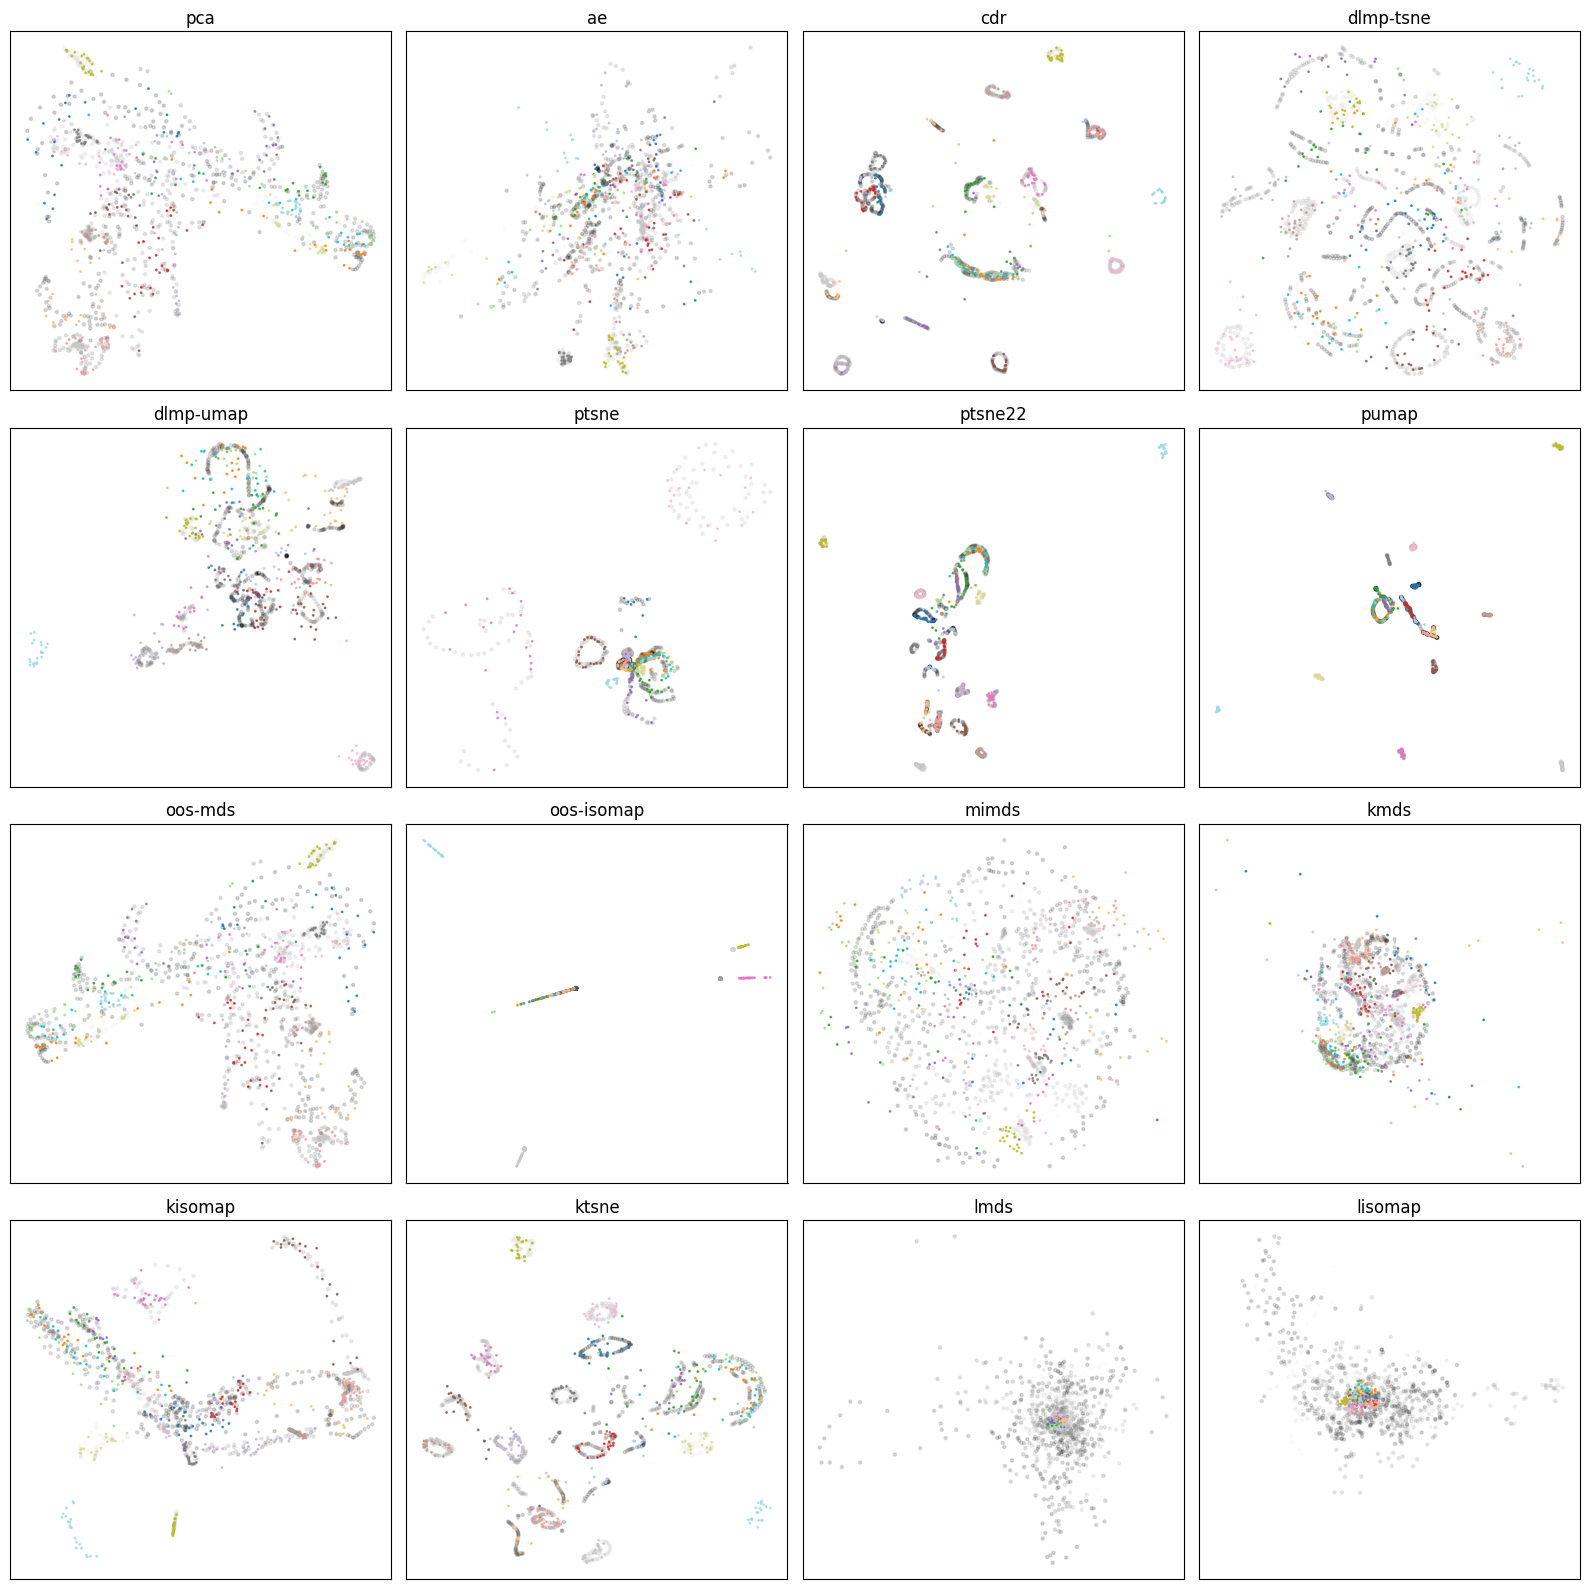

In [66]:
import matplotlib.pyplot as plt
nrows = 4
ncols = int(len(methods_name) / nrows)

fig, ax = plt.subplots(nrows, ncols, figsize=(4 * ncols, 4 * nrows))
for i, (ptrain, ptest) in enumerate(projects):
    r = i // nrows
    c = i % ncols
    ax[r, c].scatter(ptrain[:,0],ptrain[:,1],c=y_train, cmap='gray', s=5, alpha=0.15)
    # ax[r, c].scatter(ptrain[:,0],ptrain[:,1],c=ypose_train, s=5, alpha=0.2)
    ax[r, c].scatter(ptest[:,0],ptest[:,1],c=y_test, cmap='tab20', s=1, alpha=0.8)
    # ax[r, c].scatter(ptest[:,0],ptest[:,1],c=ypose_test, s=1, alpha=0.8)
    ax[r, c].set_title(methods_name[i])
    ax[r, c].set_xticks([])
    ax[r, c].set_yticks([])
fig.tight_layout()
fig.savefig('imgs/coil20.png', dpi=400)
    

In [67]:
from metrics import Metrics
import pandas as pd
metrics = Metrics()
df=pd.DataFrame(index=metrics.available())
for i,(proj, proj_test) in enumerate(projects):
    metrics.update_metrics(X_train=X_train, X_train_Embedded=proj, X_test=X_test, X_test_Embedded=proj_test, y_train=y_train, y_test=y_test)
    results=[]
    for metric_name in metrics.available():
        res,_ = metrics.run_single(metric_name)
        results.append(res)
    df[methods_name[i]] = results
        
print(df)

              pca        ae       cdr  dlmp-tsne  dlmp-umap     ptsne  \
t        0.894102  0.728930  0.956391   0.813964   0.870873  0.953542   
c        0.961941  0.822871  0.943211   0.916864   0.940918  0.961639   
nh       0.647311  0.487958  0.803035   0.657539   0.672055  0.824810   
lc       0.477400  0.370175  0.715935   0.508743   0.435500  0.714616   
sd       0.807531  0.058658  0.107997   0.127993   0.258741  0.204669   
tp      -0.050828 -0.156481 -0.127289  -0.114100  -0.107635 -0.162380   
sc      -0.006586 -0.110851  0.333741   0.125756   0.199970  0.215654   
dsc      0.422633  0.309469  0.690531   0.568129   0.683603  0.729792   
acc_oos  0.618938  0.494226  0.847575   0.618938   0.630485  0.852194   
acc_e    0.679245  0.712016  0.933466   0.988083   0.875869  0.969215   

          ptsne22     pumap   oos-mds  oos-isomap     mimds      kmds  \
t        0.975859  0.971036  0.894102    0.651525  0.832073  0.848884   
c        0.985425  0.979063  0.961941    0.822796 

## Hate Speech

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

df = pd.read_csv('org_datasets/hatespeech/labeled_data.csv')

y = np.array(df['class']).astype('uint8')

tfidf = TfidfVectorizer(strip_accents='ascii', stop_words='english', max_features=100)
X = np.array(tfidf.fit_transform(list(df['tweet'])).todense())

X_train, _, y_train, _ = train_test_split(X, y, train_size=0.12, random_state=1, stratify=y)
X = X_train
y = y_train

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.7, random_state=0, stratify=y_train)

print(X_train.shape, X_test.shape)


(2081, 100) (892, 100)


In [37]:
from utils import save_dataset

save_dataset(f"datasets/truth/hatespeech_{X_train.shape[0] + X_test.shape[0]}.h5", X_train, X_test, y_train, y_test)

## Secom dataset

In [6]:
import pandas as pd
import numpy as np
from utils import save_dataset
from sklearn.model_selection import train_test_split

df = pd.read_csv('org_datasets/secom/secom.data', sep=' ', header=None)
labels = pd.read_csv('org_datasets/secom/secom_labels.data', sep=' ', header=None)

y = np.array(labels[0])
X = np.array(df)
X[np.isnan(X)] = 0.0

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0, stratify=y)

print(X_train.shape, X_test.shape)
print('labels:', np.unique(y, return_counts=True))

# save_dataset(f'datasets/truth/secom_{X.shape[0]}.h5', X_train, X_test, y_train, y_test)

(1096, 590) (471, 590)
labels: (array([-1,  1], dtype=int64), array([1463,  104], dtype=int64))


2024-10-23 16:59:51,205 - INFO - Precomputed initialization provided. Ignoring initalization-related parameters.


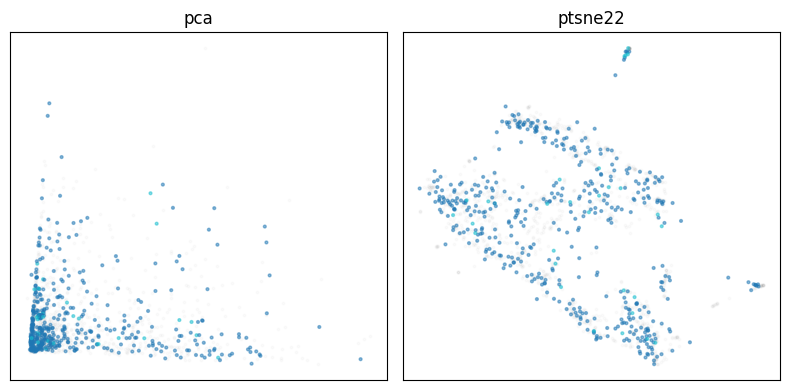

In [5]:
from methods.methods import Methods
from utils import plot_projection

methods_name=['pca', 'ptsne22']

methods = Methods(gpu_accel=True)
projects=[]
for method in methods_name:
    m = methods.get(method)
    m.fit(X_train)
    ptrain = m.transform(X_train)
    ptest = m.transform_oos(X_test)
    projects.append((ptrain, ptest))

plot_projection(projects=projects, titles=methods_name, y_train=y_train, y_test=y_test, save_path='imgs/secom.jpg')

## FMD Dataset

In [1]:
from utils import *
import h5py as h5
import numpy as np

with h5.File('org_datasets/fmd/fmd.h5','r') as f:
    X=f["X"][:]
    y=f["y"][:]

    print(X.shape, np.unique(y, return_counts=True))

(997, 1536) (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([100, 100,  99,  99, 100, 100, 100, 100,  99, 100], dtype=int64))


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0, stratify=y)
print(X_train.shape, X_test.shape)
save_dataset(f'datasets/truth/fmd_{X.shape[0]}.h5', X_train, X_test, y_train, y_test)

(697, 1536) (300, 1536)


In [3]:
from methods.methods import Methods
from utils import plot_projection

methods_name=['pca', 'ptsne22']

methods = Methods(gpu_accel=True)
projects=[]
for method in methods_name:
    m = methods.get(method)
    m.fit(X_train)
    ptrain = m.transform(X_train)
    ptest = m.transform_oos(X_test)
    projects.append((ptrain, ptest))


2024-10-23 17:05:30,382 - INFO - init
2024-10-23 17:05:31,812 - INFO - Precomputed initialization provided. Ignoring initalization-related parameters.


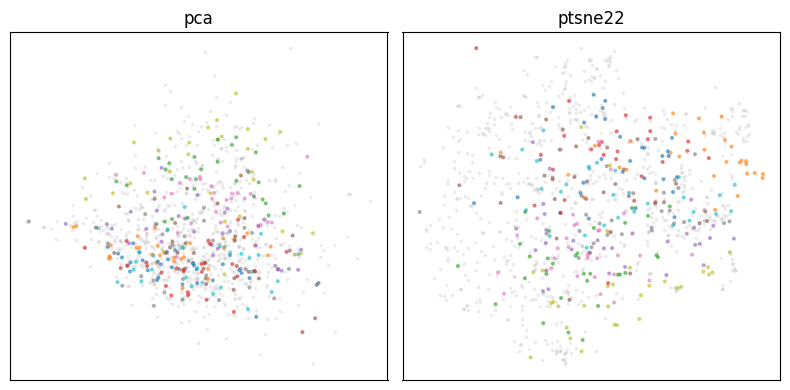

In [5]:
plot_projection(projects=projects, titles=methods_name, y_train=y_train, y_test=y_test, train_labeled=False, save_path='imgs/fmd.png')

## HD Letter

In [1]:
from utils import *
import h5py as h5
import numpy as np

with h5.File('org_datasets/letter/hdletters.h5','r') as f:
    print(f.keys())
    X=f["x"][:]
    y=f["y"][:].astype(np.uint8)

    print(X.shape, np.unique(y, return_counts=True))

<KeysViewHDF5 ['x', 'x_left', 'y', 'y_left']>
(6450, 512) (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=uint8), array([430, 430, 430, 430, 430, 430, 430, 430, 430, 430, 430, 430, 430,
       430, 430], dtype=int64))


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0, stratify=y)
print(X_train.shape, X_test.shape)
save_dataset(f'datasets/truth/letter_{X.shape[0]}.h5', X_train, X_test, y_train, y_test)

(4515, 512) (1935, 512)


In [3]:
from methods.methods import Methods
from utils import plot_projection

methods_name=['pca', 'ptsne22']

methods = Methods(gpu_accel=True)
projects=[]
for method in methods_name:
    m = methods.get(method)
    m.fit(X_train)
    ptrain = m.transform(X_train)
    ptest = m.transform_oos(X_test)
    projects.append((ptrain, ptest))


2024-10-23 17:32:05,399 - INFO - init
2024-10-23 17:32:08,286 - INFO - Precomputed initialization provided. Ignoring initalization-related parameters.


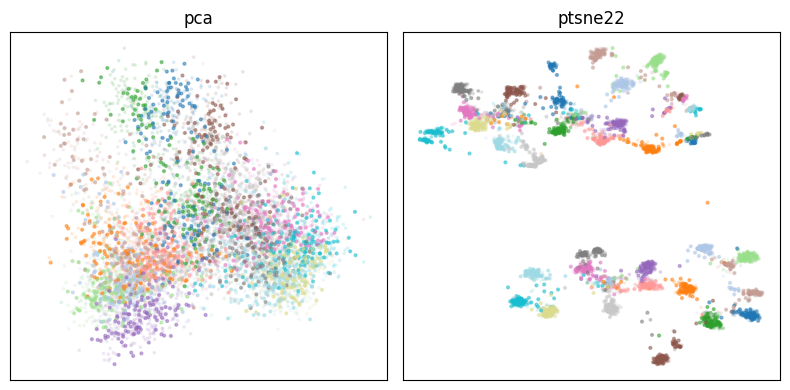

In [4]:
plot_projection(projects=projects, titles=methods_name, y_train=y_train, y_test=y_test, train_labeled=True, save_path='imgs/letter.png')

## Spambase Dataset

In [2]:
from utils import *
import h5py as h5
import numpy as np
import pandas as pd

df = pd.read_csv('org_datasets/spambase/spambase.data', sep=',', header=None)

X = df.loc[:].values[:, :-1]
y = df.loc[:].values[:, -1].astype(np.uint8)

print(X.shape, np.unique(y, return_counts=True))


(4601, 57) (array([0, 1], dtype=uint8), array([2788, 1813], dtype=int64))


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100, stratify=y)
print(X_train.shape, X_test.shape)
save_dataset(f'datasets/truth/spambase_{X_train.shape[0] + X_test.shape[0]}.h5', X_train, X_test, y_train, y_test)

(3220, 57) (1381, 57)


In [8]:
from methods.methods import Methods
from utils import plot_projection

methods_name=['pca', 'ptsne22', 'kmds']

methods = Methods(gpu_accel=True)
projects=[]
for method in methods_name:
    m = methods.get(method)
    m.fit(X_train)
    ptrain = m.transform(X_train)
    ptest = m.transform_oos(X_test)
    projects.append((ptrain, ptest))


2024-10-23 18:02:32,589 - INFO - Precomputed initialization provided. Ignoring initalization-related parameters.
2024-10-23 18:03:07,820 - INFO - add pending dealloc: cuMemFree_v2 734160 bytes
2024-10-23 18:03:07,821 - INFO - add pending dealloc: cuStreamDestroy_v2 ? bytes
2024-10-23 18:03:07,821 - INFO - add pending dealloc: cuMemFree_v2 20730360 bytes
d:\.virtualenvs\OOS-DR-Benchmark-G9pgzYZ0\lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 65 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
d:\.virtualenvs\OOS-DR-Benchmark-G9pgzYZ0\lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 33 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
d:\.virtualenvs\OOS-DR-Benchmark-G9pgzYZ0\lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 17 will likely result in GPU under-utilization due to low

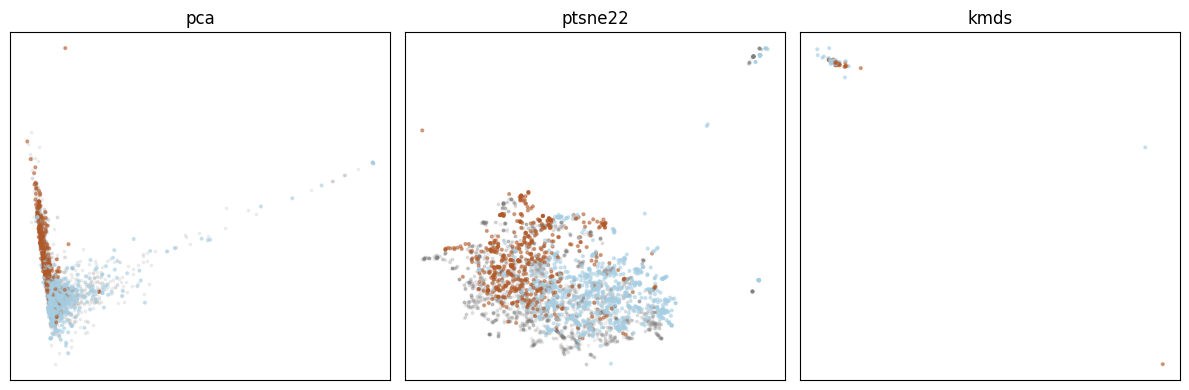

In [9]:
plot_projection(projects=projects, titles=methods_name, y_train=y_train, y_test=y_test, cmap="Paired", train_labeled=False, save_path='imgs/spambase.png')

## Epileptic Dataset

In [3]:
from utils import *
import h5py as h5
import numpy as np
import pandas as pd

df = pd.read_csv('org_datasets/epileptic/Epileptic Seizure Recognition.csv', sep=',')

X = df.loc[:].values[:, 1:-1].astype(np.float64)
y = df.loc[:].values[:, -1].astype(np.uint8)

print(X.shape, np.unique(y, return_counts=True))


(11500, 178) (array([1, 2, 3, 4, 5], dtype=uint8), array([2300, 2300, 2300, 2300, 2300], dtype=int64))


In [7]:
from sklearn.model_selection import train_test_split
X, _, y, _ = train_test_split(X, y, train_size=0.5, random_state=0, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0, stratify=y)
print(X_train.shape, X_test.shape)
save_dataset(f'datasets/truth/epileptic_{X.shape[0]}.h5', X_train, X_test, y_train, y_test)

(4024, 178) (1726, 178)


In [8]:
from methods.methods import Methods
from utils import plot_projection

methods_name=['pca', 'ptsne22', 'kmds']

methods = Methods(gpu_accel=True)
projects=[]
for method in methods_name:
    m = methods.get(method)
    m.fit(X_train)
    ptrain = m.transform(X_train)
    ptest = m.transform_oos(X_test)
    projects.append((ptrain, ptest))


2024-10-23 19:07:05,484 - INFO - Precomputed initialization provided. Ignoring initalization-related parameters.
2024-10-23 19:07:49,051 - INFO - add pending dealloc: cuMemFree_v2 2865088 bytes
2024-10-23 19:07:49,051 - INFO - add pending dealloc: cuStreamDestroy_v2 ? bytes
2024-10-23 19:07:49,051 - INFO - add pending dealloc: cuMemFree_v2 32377104 bytes
2024-10-23 19:07:49,999 - INFO - add pending dealloc: cuMemFree_v2 32192 bytes
2024-10-23 19:07:49,999 - INFO - add pending dealloc: cuMemFree_v2 32377104 bytes
2024-10-23 19:07:50,000 - INFO - add pending dealloc: cuStreamDestroy_v2 ? bytes
2024-10-23 19:07:50,000 - INFO - add pending dealloc: cuMemFree_v2 32377104 bytes
2024-10-23 19:07:50,907 - INFO - add pending dealloc: cuMemFree_v2 32192 bytes
2024-10-23 19:07:50,907 - INFO - add pending dealloc: cuMemFree_v2 32377104 bytes
2024-10-23 19:07:50,912 - INFO - add pending dealloc: cuStreamDestroy_v2 ? bytes
2024-10-23 19:07:50,913 - INFO - add pending dealloc: cuMemFree_v2 32377104 b

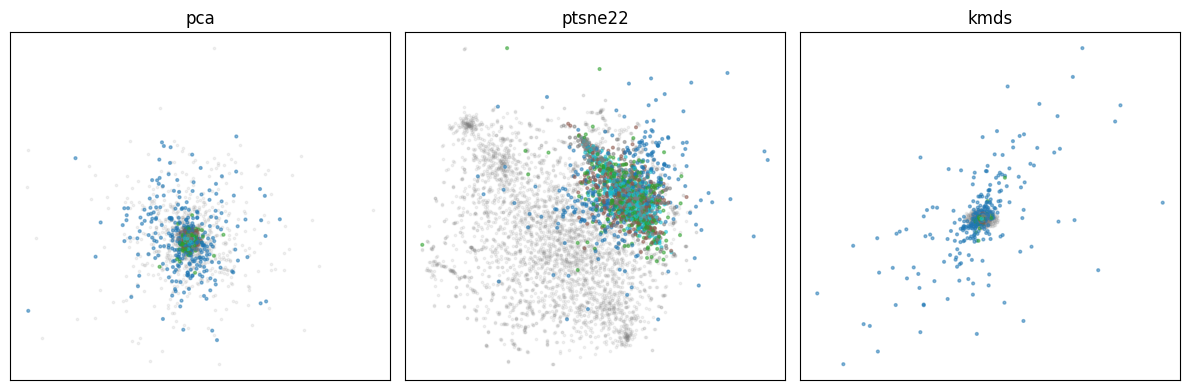

In [9]:
plot_projection(projects=projects, titles=methods_name, y_train=y_train, y_test=y_test, train_labeled=False, save_path='imgs/epileptic.png')

## Headpose Dataset

In [1]:
from glob import glob
import h5py as h5
from os.path import *
from parse import parse
from imageio import imread
import numpy as np

# person[Id][Serie][Number][Tilt][Pan]
# person01100-90+0.jpg

images = []
labels = []
poses  = []

for i in range(15):
    subdir = f'org_datasets/headpose/Person{i+1:02}'
    files = glob(join(subdir, '*.jpg'))
    for f in files:
        filename, _ = splitext(basename(f))
        id, number, tilt, pan = parse('person{:2d}{:3d}{:d}{:d}', filename)
        # print(id, number, tilt, pan)

        images.append(imread(f))
        labels.append(int(id))
        poses.append([float(tilt), float(pan)])

images = np.array(images).reshape(len(images), -1)
labels = np.array(labels)
poses  = np.array(poses)
print(images.shape)


C:\Users\liu44\AppData\Local\Temp\ipykernel_1772\2674360903.py:23: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imread(f))


(2790, 331776)


In [2]:
with h5.File('org_datasets/headpose/raw.h5', 'w') as f:
    f.create_dataset('X', data=images)
    f.create_dataset('y', data=labels)
    f.create_dataset('poses', data=poses)

In [1]:
from keras.applications import inception_resnet_v2

rgb_images = images.reshape(2790, 288, 384, 3)
model = inception_resnet_v2.InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(288, 384, 3), pooling='max')
rgb_images /= 255.0
X = model.predict(rgb_images)

NameError: name 'images' is not defined